In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd

In [2]:
df = pd.read_csv('titanic_data/processed_data.csv')
df.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,Title,relatives,not_alone
0,1,1,1,4,0,0,4,0,2,0,1
1,1,1,0,0,1,2,4,0,4,3,0
2,1,0,1,0,1,2,4,0,2,3,0
3,1,0,0,4,1,2,4,0,1,3,0
4,1,0,1,3,1,2,4,0,3,3,0


In [3]:
X = df.drop('survived',axis=1)
y = df['survived']

In [4]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)

#use inbuilt class feature_importances of tree based classifiers
print(model.feature_importances_)


[0.13002728 0.31538912 0.14075435 0.03743691 0.02793335 0.11291386
 0.04944293 0.1227985  0.04389304 0.01941065]


In [6]:
#  Set features on the basis of importance
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
X = df[feat_importances.index]
Y = df['survived']

In [7]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# Create a StandardScater model and fit it to the training data

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [9]:
# Transform the training and testing data using the X_scaler

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 115, Train/Test Score: 0.782/0.756
k: 117, Train/Test Score: 0.783/0.756
k: 119, Train/Test Score: 0.781/0.756
k: 121, Train/Test Score: 0.779/0.753
k: 123, Train/Test Score: 0.782/0.759
k: 125, Train/Test Score: 0.782/0.759
k: 127, Train/Test Score: 0.784/0.759
k: 129, Train/Test Score: 0.782/0.759
k: 131, Train/Test Score: 0.779/0.756
k: 133, Train/Test Score: 0.779/0.753
k: 135, Train/Test Score: 0.778/0.747
k: 137, Train/Test Score: 0.778/0.750
k: 139, Train/Test Score: 0.781/0.756
k: 141, Train/Test Score: 0.781/0.756
k: 143, Train/Test Score: 0.781/0.756
k: 145, Train/Test Score: 0.780/0.750
k: 147, Train/Test Score: 0.780/0.750
k: 149, Train/Test Score: 0.779/0.747
k: 151, Train/Test Score: 0.779/0.750
k: 153, Train/Test Score: 0.778/0.750


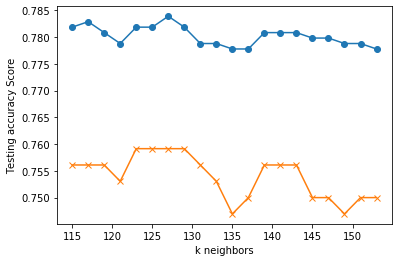

In [23]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for k in range(115, 155, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(115, 155, 2), train_scores, marker='o')
plt.plot(range(115, 155, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [24]:
# Model Accuracy
knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(X_train_scaled, y_train)
print('k=150 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=150 Test Acc: 0.750
